# Capítulo 9: Técnicas de Aprendizaje No Supervisado

Error de novatos no importar las librerías 😅. 
Mucho ojo aquí 👀, estas son lo que necesitarás: 

In [1]:
#Pandas, Numpy, Matplotlib, Os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## <span style="color:green">1. Clustering</span>

#### <span style="color:blue"> 1.1 K-means</span>

K-Means es uno de los algoritmos de clustering más sencillo de utilizar 🥳, aunque tiene sus limitaciones 😥.

Los datos tienen que estar: relativamente cirulares y poseer grupos de tamaños similares

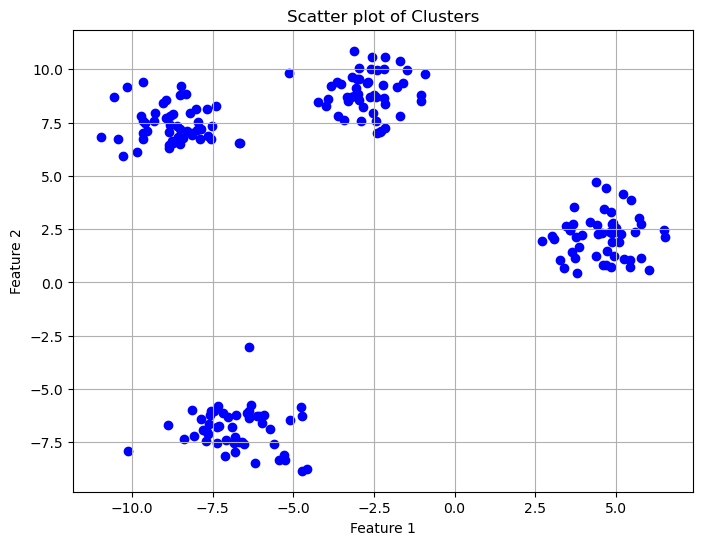

In [2]:
#Genera tu set de datos con make_blobs
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=4, random_state=42)


# Crear la grafica
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:,0], X[:, 1], color="blue")

# Agregar etiquetas de ejes y titulos
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of Clusters")

# Agregar cuadricula
plt.grid(True)

# Mostrar la grafica
plt.show()

In [3]:
#Utilizar el algoritmo de k-means que proporciona python
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k)

y_pred = kmeans.fit_predict(X)


In [4]:
#Visualiza una parte de los datos como ejemplo
X[1:5]

array([[ -5.12894273,   9.83618863],
       [ -8.85057453,   6.42626854],
       [-10.2864121 ,   5.91605914],
       [ -7.46899195,  -6.0305075 ]])

In [5]:
#Visualiza a qué cluster pertenecen esos datos
y_pred[1:5]

array([3, 1, 1, 2])

In [6]:
#Visualizar los centros de gravedad de cada cluster
z = kmeans.cluster_centers_
print("Centros de gravedad:\n", z)

Centros de gravedad:
 [[ 4.58407676  2.1431444 ]
 [-8.74950999  7.40771124]
 [-6.75399588 -6.88944874]
 [-2.70146566  8.90287872]]


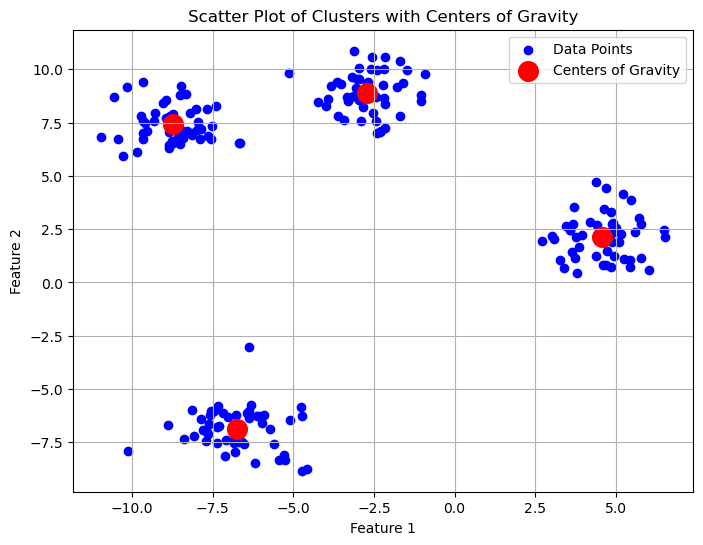

In [7]:
# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar los puntos de datos
plt.scatter(X[:, 0], X[:, 1], color="blue", label="Data Points")

# Graficar los centros de gravedad
plt.scatter(z[:, 0], z[:, 1], color="red", marker="o", s=200, label="Centers of Gravity")

# Agregar etiquetas de ejes y título
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Clusters with Centers of Gravity")

# Agregar leyenda
plt.legend()

# Agregar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

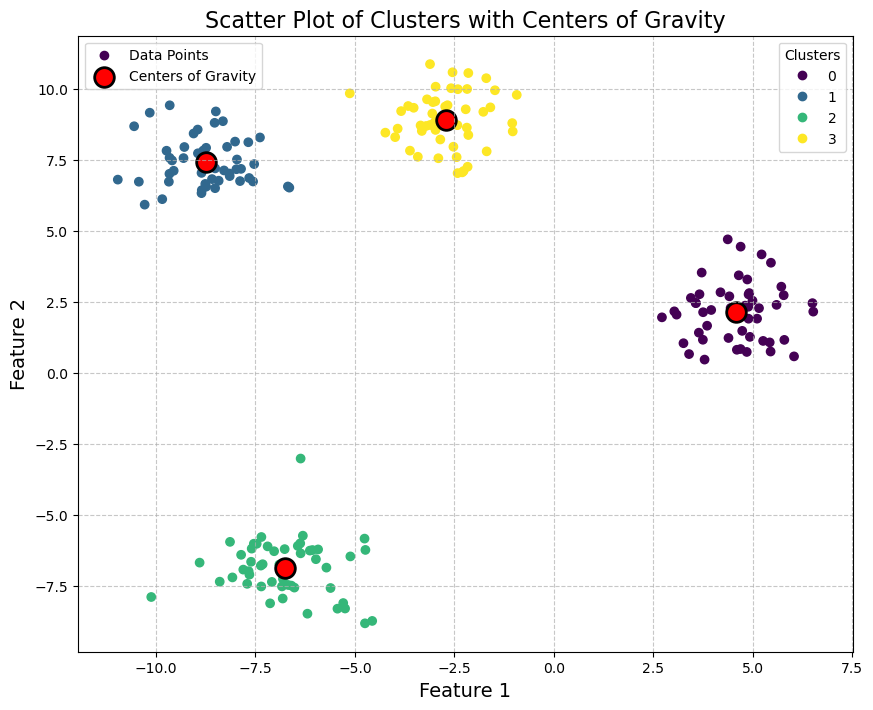

In [8]:
#Dibuja una gráfica donde cada cluster aparece de un color diferente con su respectivo centroide

# Crear la gráfica
plt.figure(figsize=(10, 8))

# Graficar los puntos de datos con colores distintos para cada cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', label="Data Points")

# Graficar los centros de gravedad
plt.scatter(z[:, 0], z[:, 1], color="red", marker="o", s=200, edgecolor="black", linewidth=2, label="Centers of Gravity")

# Agregar etiquetas de ejes y título
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.title("Scatter Plot of Clusters with Centers of Gravity", fontsize=16)

# Agregar leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="upper left")

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del gráfico para que no haya espacio en blanco innecesario
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Mostrar la gráfica
plt.show()

In [9]:
#Visualiza la distancia de cada instancia a cada uno de los centroides
kmeans.transform(X)

array([[ 1.94545274, 16.04146622, 16.21689309, 11.24497118],
       [12.39054789,  4.35958825, 16.80439654,  2.60071381],
       [14.10088677,  0.98663256, 13.47976145,  6.6291129 ],
       [15.34165325,  2.14175024, 13.28378697,  8.15184051],
       [14.56314014, 13.49909068,  1.11758643, 15.67594752],
       [13.62417203, 13.92559752,  0.87778344, 15.55568041],
       [ 0.18963039, 14.1601262 , 14.47258942,  9.74887137],
       [14.91047066,  0.57905257, 14.66930692,  6.74385504],
       [ 2.55873251, 13.40247766, 16.06301526,  8.2340594 ],
       [13.56072915, 13.91917127,  0.93838493, 15.52254951],
       [15.36309546, 14.37829968,  1.05375754, 16.64473501],
       [ 1.1719166 , 14.22863279, 15.44278024,  9.42868241],
       [ 1.44157471, 15.1209259 , 15.9376622 , 10.27115994],
       [14.92409086, 14.27325523,  0.61776579, 16.3790553 ],
       [16.12569408, 14.10222122,  2.15966743, 16.7848996 ],
       [15.58693924, 14.88444178,  1.10215162, 17.09300445],
       [10.64668035,  6.

***

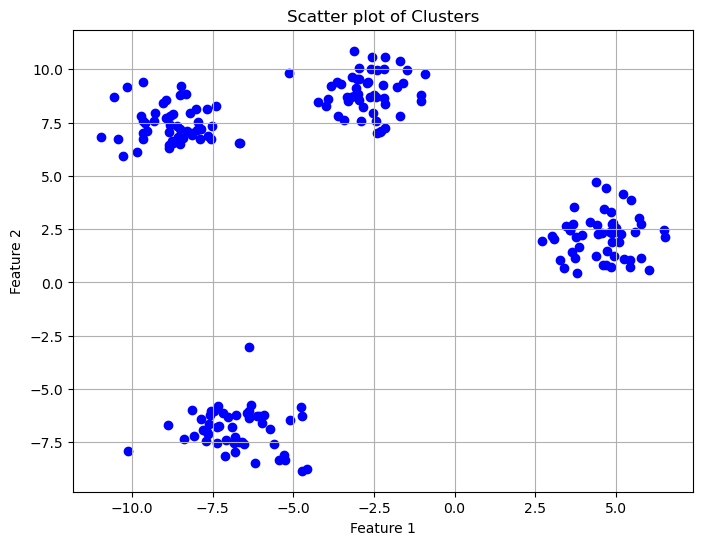

In [10]:
# Crear la grafica
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:,0], X[:, 1], color="blue")

# Agregar etiquetas de ejes y titulos
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of Clusters")

# Agregar cuadricula
plt.grid(True)

# Mostrar la grafica
plt.show()

In [11]:
#Crear un array para inicializar los centroides
ini = np.array([[-6, -6.0], [-2.5, 8.0], [5.0, 2.5], [-7.8, 6.8]])

In [12]:
#Utiliza Kmeans e inicializa tus centroides con el array de arriba
kmeans = KMeans(n_clusters=4, init=ini, n_init=1)

In [13]:
#Checar las predicciones que arroja tu algoritmo anterior
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 1, 3, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 1, 3, 1, 1, 0, 1, 2, 0, 0, 3, 3, 1, 2, 3, 2, 3, 1, 0, 1, 0, 0,
       3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 0, 0, 1, 2, 3, 2, 0, 3, 3, 0,
       2, 1, 3, 1, 1, 3, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 3, 3, 3, 3, 1,
       2, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0, 1, 3, 3, 1, 0, 1, 2, 3, 0, 0, 3,
       2, 0, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0,
       1, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 0, 0, 1, 3, 2, 3,
       0, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 3, 1, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 3, 3, 3, 1, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 2, 1,
       0, 2])

In [14]:
#Visualiza los centros de gravedad de cada cluster
z = kmeans.cluster_centers_
z

array([[-6.75399588, -6.88944874],
       [-2.70146566,  8.90287872],
       [ 4.58407676,  2.1431444 ],
       [-8.74950999,  7.40771124]])

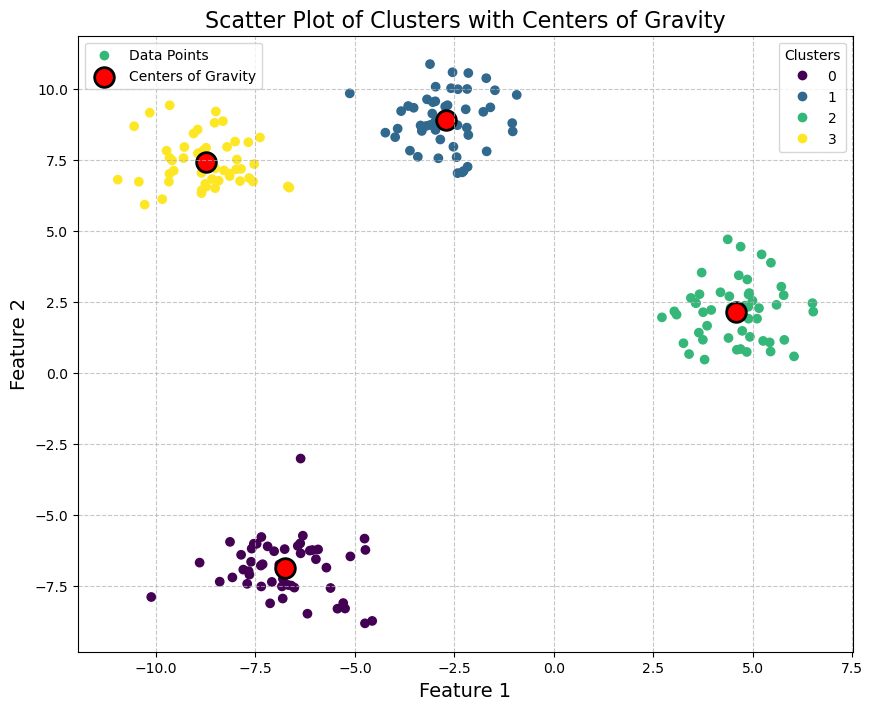

In [15]:
#Dibuja una gráfica donde cada cluster aparece de un color diferente con su respectivo centroide
# Crear la gráfica
plt.figure(figsize=(10, 8))

# Graficar los puntos de datos con colores distintos para cada cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', label="Data Points")

# Graficar los centros de gravedad
plt.scatter(z[:, 0], z[:, 1], color="red", marker="o", s=200, edgecolor="black", linewidth=2, label="Centers of Gravity")

# Agregar etiquetas de ejes y título
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.title("Scatter Plot of Clusters with Centers of Gravity", fontsize=16)

# Agregar leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="upper left")

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del gráfico para que no haya espacio en blanco innecesario
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Mostrar la gráfica
plt.show()

In [16]:
#Presenta la inercia del algoritmo
print("Inercia: ", kmeans.inertia_)

Inercia:  362.92318657342634


In [17]:
#Presenta el puntaje del algoritmo (score)
print("Inercia (negativa): ", kmeans.score(X))

Inercia (negativa):  -362.9231865734263


***

#### <span style="color:blue"> 1.2 Mini-Batch K-Means</span>

Es básicamente el mismo algoritmo de K-Means pero corre los datos en pequeños lotes. Esto es ideal para datos en línea o bases de datos extensas. 

Aunque da resultados similares al K-Means, pierdes fidelidad

In [18]:
#Importar de Sklearn.Cluster el algoritmo de MiniBatchKmeans
#Te puede salir un warning pero no afecta en el proceso
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=4)
mb_kmeans.fit(X)

MiniBatchKMeans(n_clusters=4)

In [19]:
#Presenta el puntaje del algoritmo (score)
mb_kmeans.score(X)

-363.3552895267373

***

In [20]:
#Corre el algoritmo limpio del inicio, presentar las predicciones y la inercia del mismo.
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

362.92318657342634

In [21]:
# Toma el algoritmo del inicio para calcular las inercias cuando se utiliza de 1 a 9 clusters
X2 = np.arange(1, 9)
y2 = []

for i in X2:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    y2.append(kmeans.inertia_)

# Convertir y2 a un array de Numpy para facilitar operaciones
y2 = np.array(y2)

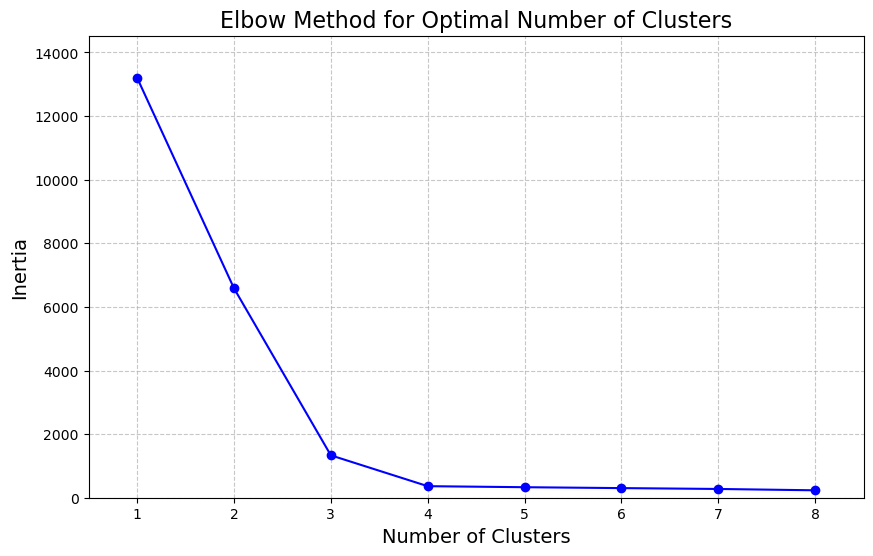

In [22]:
#Grafica las inercias anteriores

# Graficar las inercias
plt.figure(figsize=(10, 6))
plt.plot(X2, y2, marker='o', linestyle='-', color='b')

# Agregar etiquetas de ejes y título
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del gráfico para que no haya espacio en blanco innecesario
plt.xlim(0.5, 8.5)
plt.ylim(0, max(y2) * 1.1)

# Mostrar la gráfica
plt.show()

In [23]:
#Obtenen el coeficiente de silueta
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(X, kmeans.labels_)

0.33847180390623444

In [24]:
#Ejecuta el algoritmo varias veces con diferentes clusters y obtenen sus coeficientes de silueta


X2 = np.arange(2, 9)
y2 = []

for k in X2:
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    labels = kmeans2.fit_predict(X)
    score = silhouette_score(X, labels)
    y2.append(score)

# Convertir y2 a un array de NumPy para facilitar operaciones futuras
y2 = np.array(y2)

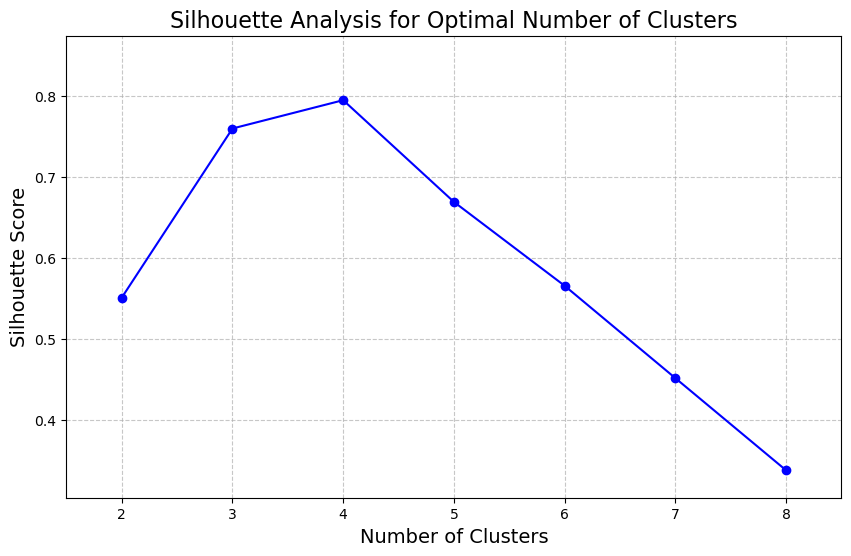

In [25]:
#Grafica los coeficientes de silueta
# Graficar los coeficientes de silueta
plt.figure(figsize=(10, 6))
plt.plot(X2, y2, marker='o', linestyle='-', color='b')

# Agregar etiquetas de ejes y título
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Analysis for Optimal Number of Clusters', fontsize=16)

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del gráfico para que no haya espacio en blanco innecesario
plt.xlim(1.5, 8.5)
plt.ylim(min(y2) * 0.9, max(y2) * 1.1)

# Mostrar la gráfica
plt.show()

Para n_clusters = 2 La media de silhouette_score es : 0.5968606850911684
Para n_clusters = 3 La media de silhouette_score es : 0.7598552034542879
Para n_clusters = 4 La media de silhouette_score es : 0.7947822916132821
Para n_clusters = 5 La media de silhouette_score es : 0.6906143757753677
Para n_clusters = 6 La media de silhouette_score es : 0.5620982150792001


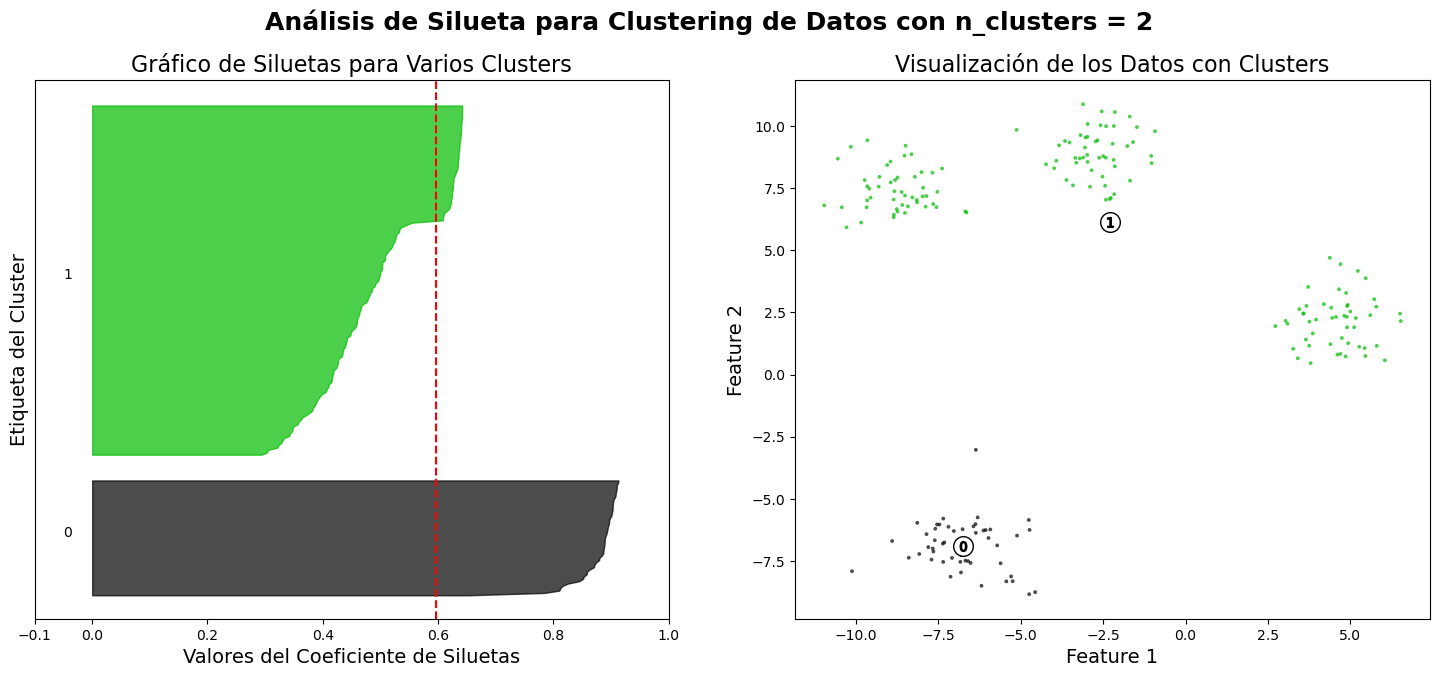

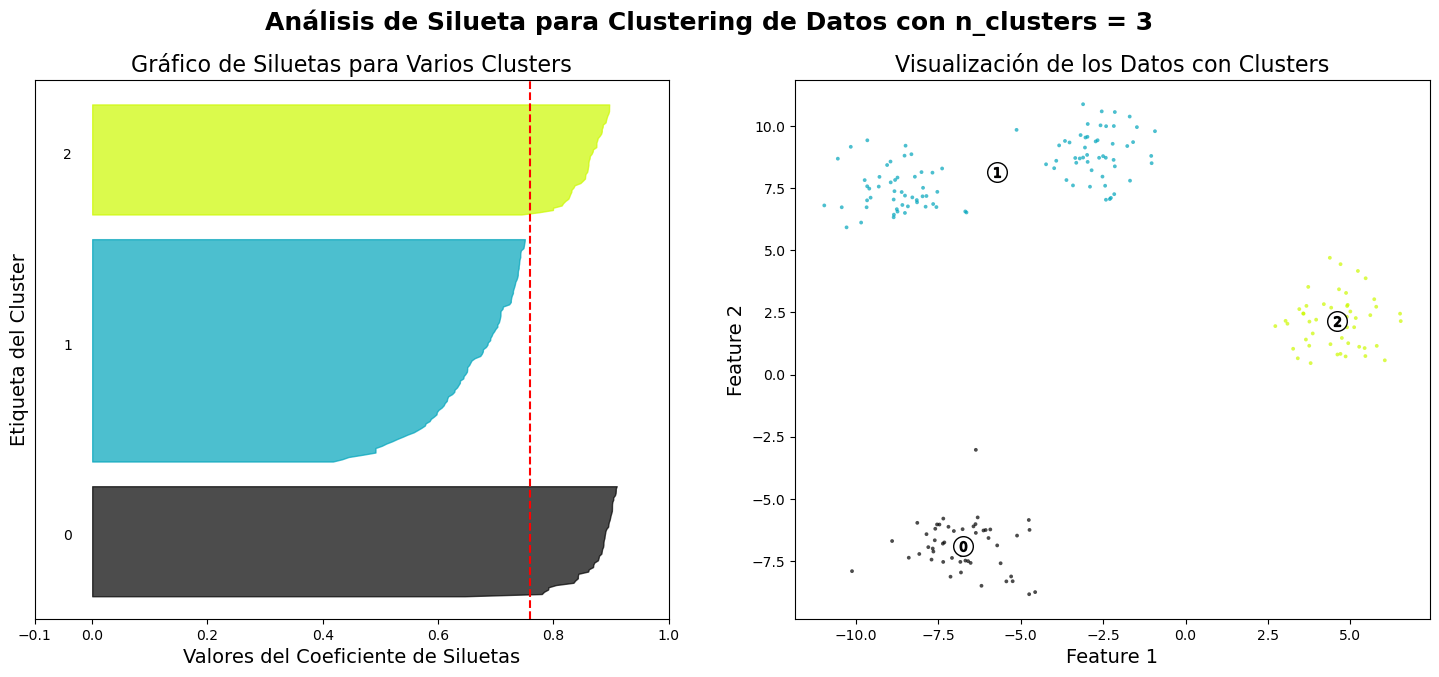

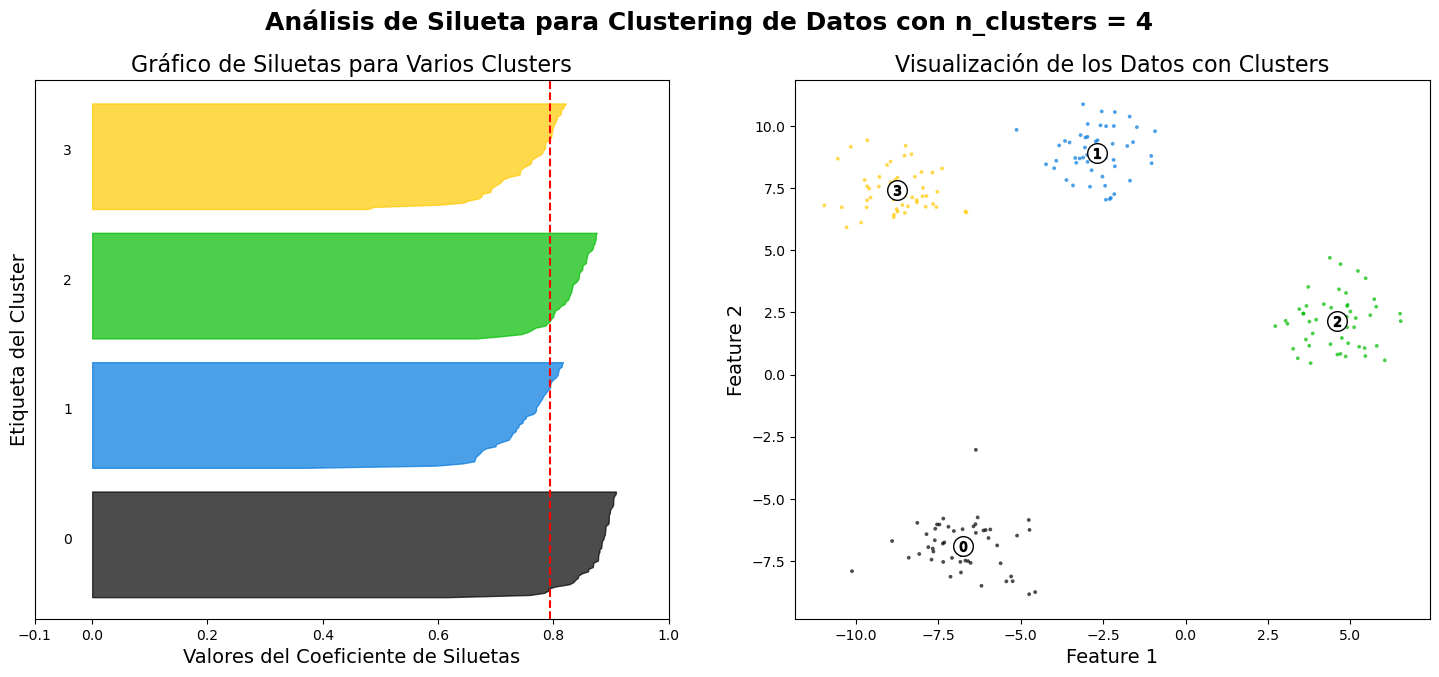

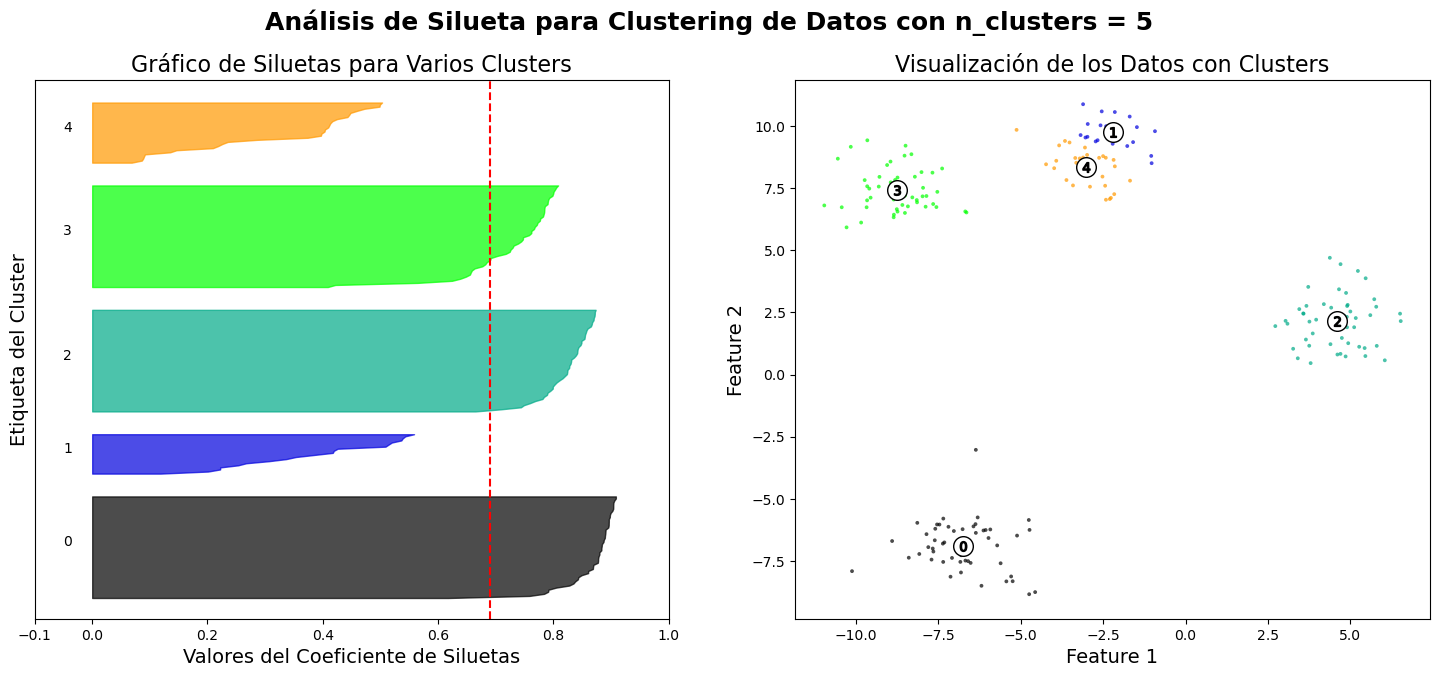

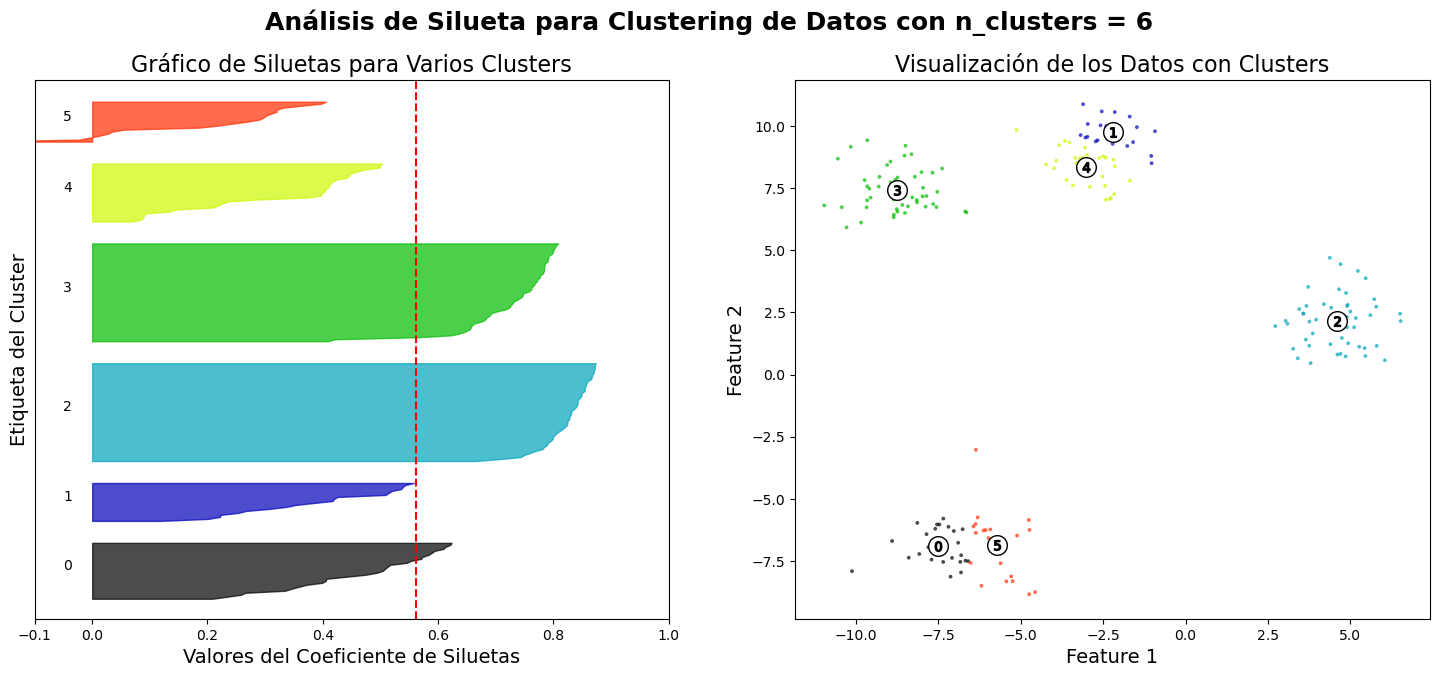

In [26]:
#Realiza el diagrama de silueta
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "La media de silhouette_score es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Gráfico de Siluetas para Varios Clusters", fontsize=16)
    ax1.set_xlabel("Valores del Coeficiente de Siluetas", fontsize=14)
    ax1.set_ylabel("Etiqueta del Cluster", fontsize=14)

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualización de los Datos con Clusters", fontsize=16)
    ax2.set_xlabel("Feature 1", fontsize=14)
    ax2.set_ylabel("Feature 2", fontsize=14)

    plt.suptitle(
        "Análisis de Silueta para Clustering de Datos con n_clusters = %d" % n_clusters,
        fontsize=18,
        fontweight="bold",
    )

plt.show()

***

#### <span style="color:blue"> 1.3 Segmentación de Imágenes</span>

La segmentación de imágenes es un ejemplo de aplicación del clustering. 


Existen diferentes niveles de segmentación, entre ellos está la segmentación semántica, segmentación por instancia y segmentación de imágenes por color.

In [27]:
#Importa imread
#Lee la imagen de la pelota de tenis
from matplotlib.image import imread

img = imread(os.path.abspath('Tenis.jpg'))
img.shape

(661, 1053, 3)

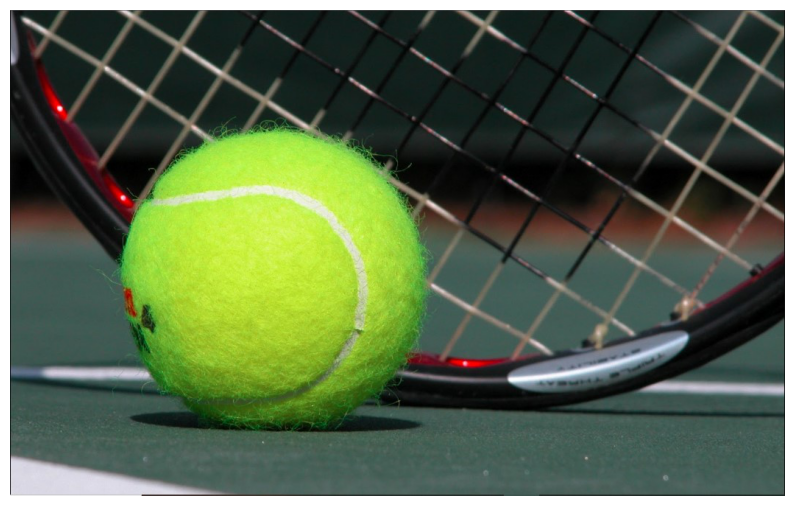

In [28]:
#Muestra la imagen
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

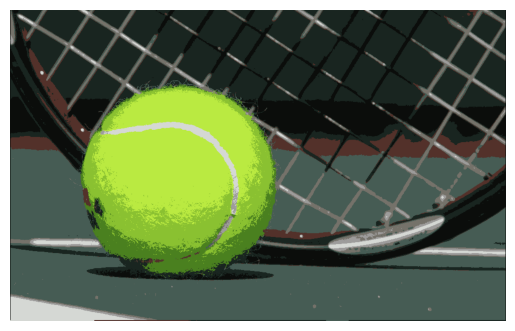

In [29]:
#Cambia la forma a la imagen para que K-means pueda correrlo
#Corre el algoritmo de K-Means

# Cambia la forma a la imagen para que K-means pueda correrlo
vectorized = img.reshape((-1, 3))

# Corre el algoritmo de K-Means
k = 10
kmeans = KMeans(n_clusters=k, random_state=42).fit(vectorized)

# Obtener los centro y convierte a np.unit8

centers = np.uint8(kmeans.cluster_centers_)

# Asigna los centros a los pixeles

segmented_data = centers[kmeans.labels_.flatten()]

# Cambiar la forma de nuevo a la original

segmented_image = segmented_data.reshape(img.shape)

# Muestra la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

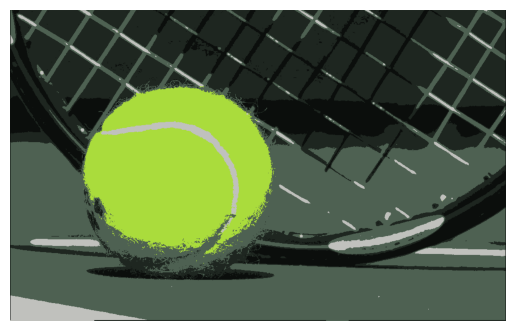

In [30]:
#Varía el valor de k
# Cambia la forma a la imagen para que K-means pueda correrlo
vectorized = img.reshape((-1, 3))

# Corre el algoritmo de K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42).fit(vectorized)

# Obtener los centro y convierte a np.unit8

centers = np.uint8(kmeans.cluster_centers_)

# Asigna los centros a los pixeles

segmented_data = centers[kmeans.labels_.flatten()]

# Cambiar la forma de nuevo a la original

segmented_image = segmented_data.reshape(img.shape)

# Muestra la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

***

#### <span style="color:blue"> 1.4 Clustering con Preprocesamiento</span>

In [31]:
#Importa los dígitos de MNIST desde Sklearn
#Asigna las variables x, y

from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [32]:
#Importa train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True, shuffle=True)

In [33]:
#Arma una regresión logística
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
#Despliega el puntaje de la regresión (log.score)
log.score(X_test, y_test)

0.9722222222222222

In [35]:
#Arma un pipeline que incluya el algoritmo de K-Means
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=30)),
    ("log", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=30)),
                ('log', LogisticRegression(max_iter=1000))])

In [36]:
#Despliega el puntaje del pipeline anterior
pipeline.score(X_test, y_test)

0.9694444444444444

In [37]:
#Arma un GridSearch para identificar con cuántos clusters se puede correr
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=30)),
                                       ('log',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [38]:
#Obtene el mejor parámetro con grid.best_params_
grid.best_params_

{'kmeans__n_clusters': 89}

In [69]:
#Obtene el puntaje del GridSearch (Grid.score)
grid.best_score_

0.9707825203252032

***

#### <span style="color:blue"> 1.4 DBSCAN</span>

Puede funcionar cuando K-Means esta limitado. Este algoritmo define los clusters como regiones continuas de alta densidad.

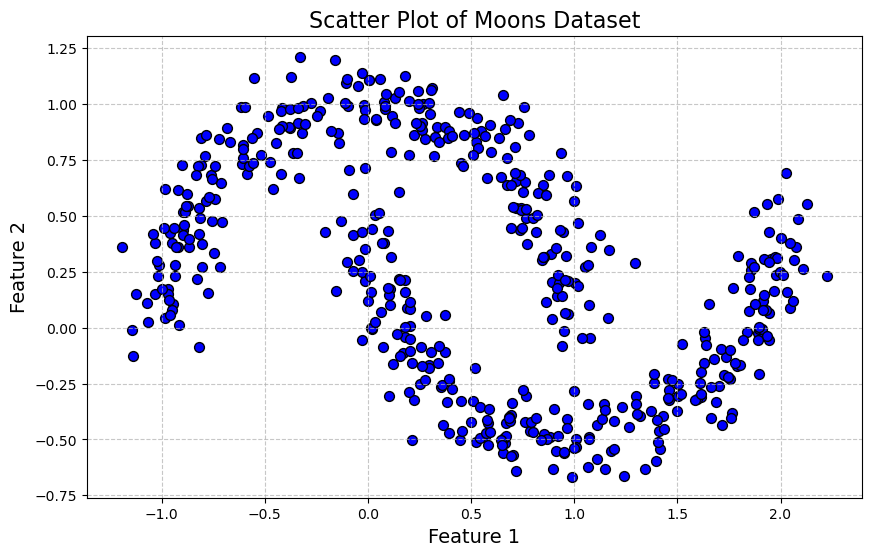

In [108]:
#Crea set de datos con make_moons y graficarlo
from sklearn.datasets import make_moons

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', edgecolor='k', s=50)

# Agregar etiquetas de ejes y título
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.title('Scatter Plot of Moons Dataset', fontsize=16)

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

In [90]:
#Importa DBSCAN de Sklearn y correrlo
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)

dbscan.fit(X)

DBSCAN(eps=0.05)

In [91]:
#Verifica como se hizo la agrupación de las instancias con la función labels_

dbscan.labels_

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2, -1,  2, -1, -1, -1, -1,  3, -1, 13, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       -1,  5, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,  6, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1,  5, -1, -1, -1,  7,
       -1, -1, -1, -1,  4, -1, -1, -1, -1, -1,  0, -1, -1, -1,  9, -1, -1,
       -1, -1, -1, -1, 17,  8, -1,  6, -1, -1, 17, -1, -1, -1, 14,  0, -1,
       12, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 14, -1,  9,  0, -1, -1,  6, -1,  9,
       -1, 17, -1, -1, -1, -1, -1, -1,  3,  6, -1, -1, -1, -1, -1,  9, -1,
       -1, -1,  2, -1, -1, -1,  9,  9, -1, -1, -1, -1, -1, -1, -1,  5, -1,
       -1, -1, -1, -1, -1

In [104]:
#Modifica el parámetro epsilon del algoritmo DBSCAN
dbscan = DBSCAN(eps=0.166, min_samples=5)

dbscan.fit(X)

dbscan.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [105]:
#Importa Kneighbors Classifier para clasificar los datos de DBSCAN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [106]:
#predice las clasificación de datos aleatorios para ejemplificar el método

X_nuevo = np.array([
    [-0.5, 0],
    [0, 0.5],
    [1, -0.1],
    [2, 1]
])

knn.predict(X_nuevo)

array([0, 1, 1, 1], dtype=int64)

In [107]:
knn.predict_proba(X_nuevo)

array([[0.64, 0.36],
       [0.36, 0.64],
       [0.42, 0.58],
       [0.1 , 0.9 ]])

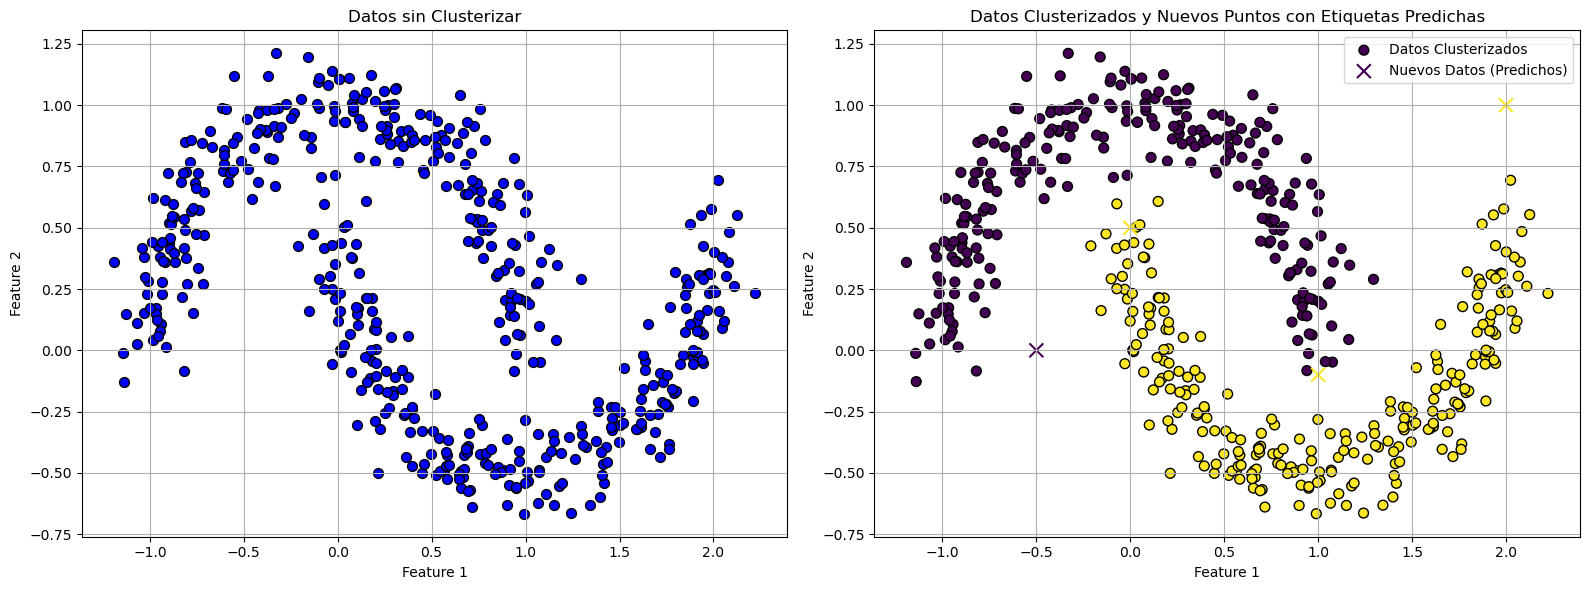

In [116]:
# Predecir las etiquetas para los datos nuevos
etiquetas_nuevas = knn.predict(X_nuevo)

# Crear la figura con dos subgráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Datos sin clusterizar
ax1.scatter(X[:, 0], X[:, 1], color='blue', edgecolor='k', s=50)
ax1.set_title('Datos sin Clusterizar')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True)

# Gráfica 2: Datos clusterizados y nuevos puntos con etiquetas predichas
ax2.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', edgecolor='k', s=50, label='Datos Clusterizados')
ax2.scatter(X_nuevo[:, 0], X_nuevo[:, 1], c=etiquetas_nuevas, cmap='viridis', edgecolor='k', s=100, marker='x', label='Nuevos Datos (Predichos)')
ax2.set_title('Datos Clusterizados y Nuevos Puntos con Etiquetas Predichas')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

***

### <span style="color:green"> 2. Mezclas Gaussianas</span>

Las Mezclas Gaussianas es la manera más robusta de hacer clusters 💪 pero, también es la más pesada.

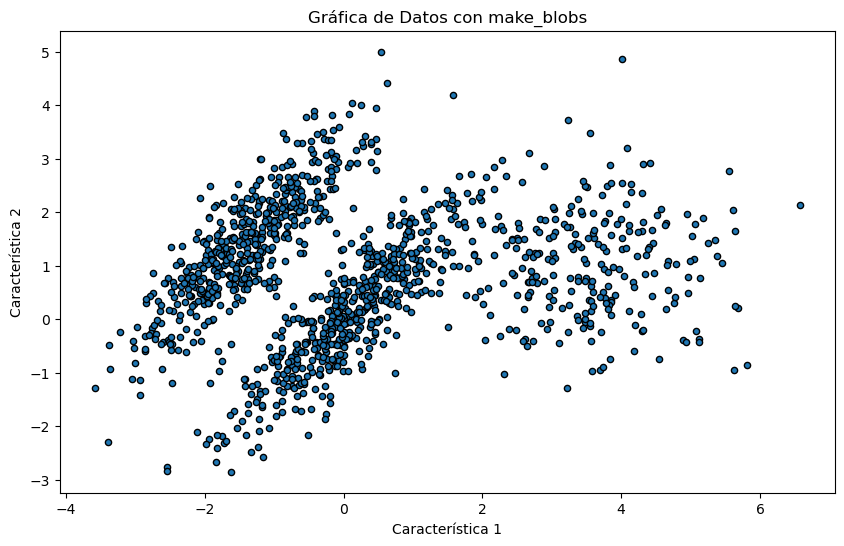

In [6]:
#Crea set de datos con make blobs y graficarlo
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)

X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

# Graficar los datos sin clusterización
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, edgecolor='k')

# Agregar título y etiquetas de los ejes
plt.title('Gráfica de Datos con make_blobs')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Mostrar la gráfica
plt.show()

In [7]:
#Importa GaussianMixture de Sklearn
from sklearn.mixture import GaussianMixture

In [12]:
#Genera GaussianMixture especificando los parámetros n_components y n_int
gm = GaussianMixture(n_components=3, n_init=10)

In [13]:
#Obten los pesos que le asignó a los datos
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [16]:
# Obten los pesos de los datos
gm.weights_

array([0.20961444, 0.40005972, 0.39032584])

In [17]:
#Obten las medias de los datos
gm.means_

array([[ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848],
       [ 0.05145113,  0.07534576]])

In [18]:
#Obten la matriz de covarianzas
gm.covariances_

array([[[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [19]:
#Verifca si convergió
gm.converged_

True

In [20]:
#Obten el número de iteraciones
gm.n_iter_

4

In [21]:
#Predecé el cluster de los primeros 5 datos
gm.predict(X)[0:5]

array([2, 2, 1, 2, 1], dtype=int64)

In [22]:
#Obten las probabilidades de una clustering correcto de cada uno de los datos
gm.predict_proba(X)[0:5]

array([[2.31833274e-02, 6.76282339e-07, 9.76815996e-01],
       [1.64110061e-02, 6.74575575e-04, 9.82914418e-01],
       [1.99781831e-06, 9.99922764e-01, 7.52377580e-05],
       [8.48983970e-03, 8.64003688e-06, 9.91501520e-01],
       [2.31088296e-08, 9.99999975e-01, 2.35665725e-09]])

In [25]:
#Genera nuevos datos para evaluar la eficiencia del clasificador
X_nuevo, y_nuevo = gm.sample(1000)

In [26]:
#Despliega los datos nuevos de x
X_nuevo

array([[ 4.80537565, -0.0606356 ],
       [ 3.90858742,  1.25205015],
       [ 3.26302971,  0.27343172],
       ...,
       [-0.08551588,  0.55943874],
       [-0.16560353, -0.65103977],
       [-0.11075244, -0.20087078]])

In [27]:
#Clasifica los nuevos datos
y_nuevo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

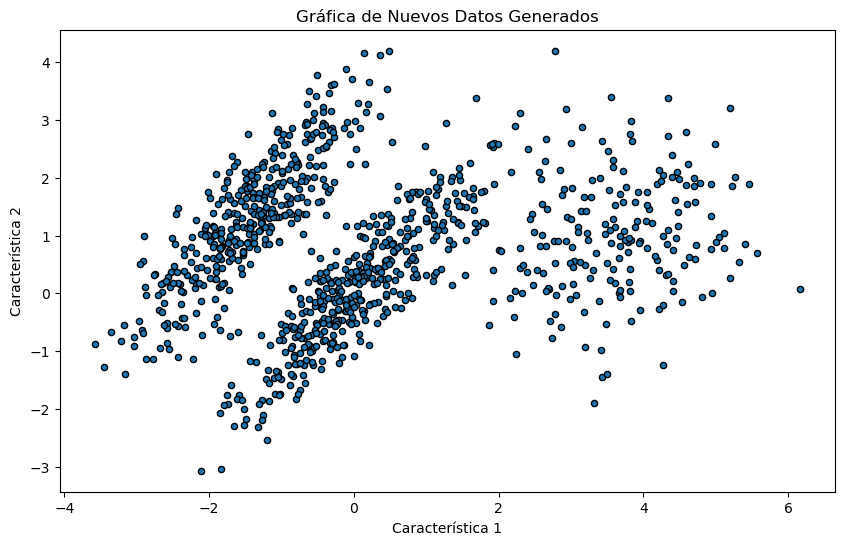

In [30]:
# Grafica los nuevos datos sin clusterizar
plt.figure(figsize=(10, 6))
plt.scatter(X_nuevo[:, 0], X_nuevo[:, 1], s=20, edgecolor='k')

# Agregar título y etiquetas de los ejes
plt.title('Gráfica de Nuevos Datos Generados')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Mostrar la gráfica
plt.show()

***

Las anomalías son cualquier dato que se encuentre fuera de la zona de alta densidad.

In [31]:
#Obten los puntajes de cada una de las muestras
densidad = gm.score_samples(X)

In [32]:
#Convierte los puntajes en percentiles y conoce el resultado con percentil 4
#Obten las anomalías que son menores al umbral de densidad que definiste
#Visualiza las anomalías
umbral_densidad = np.percentile(densidad, 4)

anomalias = X[densidad < umbral_densidad]

anomalias

array([[-0.11118987,  1.61334992],
       [ 0.62362922,  4.41540435],
       [ 1.49808977, -0.15251688],
       [ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.62447969, -0.45770022],
       [-1.74680316, -0.78385111],
       [-3.58308316, -1.28249917],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.81015204, -0.58926015],
       [-1.79651788, -0.97031471],
       [-2.11225785, -2.09712817],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.48037945, -1.18651064],
       [-2.93972237, -1.41660564],
       [-1.62285961, -2.84860478],
       [-0.25954463, -1.7743691 ],
       [ 0.46018217,  2.78323717],
       [-2.06317379,  2.2670332 ],
       [ 0.13982849,  2.08023553],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.15568262, -2.57480367],
       [-1.93315582,  2.49030105],
       [ 4.93207567, -0.42157602],
       [ 5.80546094,

In [33]:
#Varía el percentil
umbral_densidad = np.percentile(densidad, 2)

anomalias = X[densidad < umbral_densidad]

anomalias

array([[ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.74680316, -0.78385111],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.79651788, -0.97031471],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.06317379,  2.2670332 ],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.93315582,  2.49030105],
       [ 5.80546094, -0.85297906],
       [ 5.68060531,  0.20598784],
       [ 3.55103259,  3.47752824],
       [ 5.5515503 ,  2.76962697],
       [ 4.00585006,  4.86701762],
       [ 3.22614554,  3.73445529],
       [ 5.61295857,  2.04675139],
       [ 5.62383575, -0.93780167],
       [ 2.30754386, -1.02494605],
       [ 6.56968319,  2.13386104],
       [ 3.21575068, -1.28763504],
       [ 4.07765947,  3.20474175]])

***

#### <span style="color:blue"> 2.1 Detección de Anomalías</span>


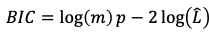

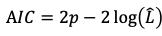

m=número de instancias
p=número de parámetros 
L= Verosimilitud

In [35]:
#calcula el BIC para los datos
print("BIC: ", gm.bic(X))
#calcula el AIC para los datos
print("AIC: ", gm.aic(X))

BIC:  8189.733705221636
AIC:  8102.508425106598


In [46]:
#Puedes hacer el GridSearch
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores para el numero de clusters
param_grid = {
    "n_components": range(2, 101)
}

gmm = GaussianMixture()

grid_search = GridSearchCV(gmm, param_grid, cv=3, verbose=2)

grid_search.fit(X)

# Obtener el mejor numero de clusters

best_n_components = grid_search.best_params_['n_components']

print(f"El mejor numero de cluster es: {best_n_components}")


Fitting 3 folds for each of 99 candidates, totalling 297 fits
[CV] END .....................................n_components=2; total time=   0.0s
[CV] END .....................................n_components=2; total time=   0.0s
[CV] END .....................................n_components=2; total time=   0.0s
[CV] END .....................................n_components=3; total time=   0.0s
[CV] END .....................................n_components=3; total time=   0.0s
[CV] END .....................................n_components=3; total time=   0.0s
[CV] END .....................................n_components=4; total time=   0.0s
[CV] END .....................................n_components=4; total time=   0.0s
[CV] END .....................................n_components=4; total time=   0.0s
[CV] END .....................................n_components=5; total time=   0.0s
[CV] END .....................................n_components=5; total time=   0.0s
[CV] END .....................................n

***

#### <span style="color:blue"> 2.2 Modelo Bayesiano de Mezclas Gaussianas</span>

La única labor en este modelo es adivinar un número de clusters mayor al óptimo 🔮. 


Ojo: a los clusters que no sirven simplemente se les asignará el valor 0

In [49]:
#Importa BayesianGaussianMixture

from sklearn.mixture import BayesianGaussianMixture


In [50]:
#Adivina y asigna la cantidad de clusters al algoritmo
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [51]:
#Redondea los pesos con np.round
np.round(bgm.weights_, 2)

array([0.21, 0.4 , 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])